In [7]:
# Do not change
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.preprocessing import StandardScaler

import seaborn as sns

# Exercise 8

## Task 1 (Getting to know SVM)

Try to understand the following code. Experiment with the parameters of the function make_blobs.

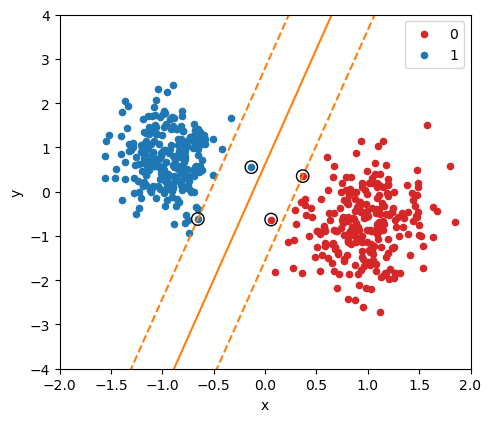

In [25]:
data_x, y = make_blobs(n_samples = 500, n_features=2, centers=2, cluster_std=(.8,.6), center_box=(-16,2.5), random_state=143)

scaler = StandardScaler()
scaler.fit(data_x)

x = scaler.transform(data_x)

df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))

colors = {0: 'tab:red', 1: 'tab:blue'}

fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

sep = svm.SVC(kernel="linear", C=2)
sep.fit(x, y)

# get the separating hyperplane
w = sep.coef_[0]
a = -w[0] / w[1]
x = np.linspace(-10, 2)
y = a * x - (sep.intercept_[0]) / w[1]
ax.plot(x, y, c='tab:orange')

margin = 1 / np.sqrt(np.sum(sep.coef_**2))
yy_down = y - np.sqrt(1 + a**2) * margin
yy_up = y + np.sqrt(1 + a**2) * margin

ax.plot(x, yy_down, c='tab:orange', ls='--')
ax.plot(x, yy_up, c='tab:orange', ls='--')

ax.scatter(
        sep.support_vectors_[:, 0],
        sep.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )

ax.set_xlim([-2,2])
ax.set_ylim([-4,4])

plt.show()

**Task:** What is the StandardScaler doing? Replace the StandardScaler with a self-written function that does a normalization, i.e. scaling the features to the interval [-1,1] (or [0,1] if you prefer). Visualize the result.

**Task:** Experiment with the parameters of the SVM classifier (leave the kernel to be linear for now).

## Task 2 (SVM with not completely separable data)
Create with the make_blobs function from the previous task a data set that cannot be separated by a line. Visualize the data, do not fit a SVM, yet.

**Task:** Try to find the best linear classifier (SVM) for the data you just created. Experiment with the value of the parameter C in the SVM classifier. What does it do?

**Task:** Now repeat the previous subtask, but first split the data into training and test data (Visualize both in two subplots (side by side)). Fit a SVM classifier to the training data and evaluate its performance with the test data.

**Task:** Now try different kernels for the training/test data of the previous subtask. Evaluate the performance and visualize the results using [Kernel PCA Visualization](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html).

**Task:** What is the best kernel for your data?

# Information
Voluntary tasks and tasks regarding PCA will be released before the end of the year. The tasks will be announced on the FELIX forum (so make sure to turn notifications on), including some changes in the submission procedure for voluntary tasks.